# 项目：用逻辑回归预测泰坦尼克号幸存情况

## 分析目标

此数据分析报告的目的是，基于泰坦尼克号乘客的性别和船舱等级等属性，对幸存情况进行逻辑回归分析，从而能利用得到的模型，对未知幸存情况的乘客，根据属性预测是否从沉船事件中幸存。

## 简介

> 泰坦尼克号（英语：RMS Titanic）是一艘奥林匹克级邮轮，于1912年4月首航时撞上冰山后沉没。泰坦尼克号是同级的3艘超级邮轮中的第2艘，与姐妹船奥林匹克号和不列颠号为白星航运公司的乘客们提供大西洋旅行。

> 泰坦尼克号由位于北爱尔兰贝尔法斯特的哈兰·沃尔夫船厂兴建，是当时最大的客运轮船，由于其规模相当一艘现代航空母舰，因而号称“上帝也沉没不了的巨型邮轮”。在泰坦尼克号的首航中，从英国南安普敦出发，途经法国瑟堡-奥克特维尔以及爱尔兰昆士敦，计划横渡大西洋前往美国纽约市。但因为人为错误，于1912年4月14日船上时间夜里11点40分撞上冰山；2小时40分钟后，即4月15日凌晨02点20分，船裂成两半后沉入大西洋，死亡人数超越1500人，堪称20世纪最大的海难事件，同时也是最广为人知的海难之一。

数据集包括两个数据表：`titianic_train.csv`和`titanic_test.csv`。

`titianic_train.csv`记录了超过八百位泰坦尼克号乘客在沉船事件后的幸存情况，以及乘客的相关信息，包括所在船舱等级、性别、年龄、同乘伴侣/同胞数量、同乘父母/孩子数量，等等。

`titanic_test.csv`只包含乘客（这些乘客不在`titianic_train.csv`里）相关信息，此文件可以被用于预测乘客是否幸存。

`titianic_train.csv`每列的含义如下：
- PassengerId：乘客ID
- survival：是否幸存
   - 0	否
   - 1	是
- pclass：船舱等级
   - 1	一等舱
   - 2	二等舱
   - 3  三等舱
- sex：性别
- Age：年龄
- sibsp：同乘伴侣/同胞数量
- parch：同乘父母/孩子数量
- ticket：船票号
- fare：票价金额
- cabin：船舱号
- embarked：登船港口
   - C  瑟堡
   - Q  皇后镇
   - S  南安普敦
   
   
`titianic_test.csv`每列的含义和上面相同，但不具备survival变量的数据，即是否幸存。

# 一 读取数据

In [1]:
import pandas as pd
original_data=pd.read_csv(r"C:\Users\squall\Desktop\jupyter\课程配套文件\07 数据分析\titanic_train.csv")

# 二 评估清洗数据

In [2]:
cleaned_data=original_data.copy()

### 评估清洗数据结构

In [3]:
# 随机5条数据
cleaned_data.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
130,131,0,3,"Drazenoic, Mr. Jozef",male,33.0,0,0,349241,7.8958,NaN,C
538,539,0,3,"Risien, Mr. Samuel Beard",male,NaN,0,0,364498,14.5000,NaN,S
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
50,51,0,3,"Panula, Master. Juha Niilo",male,7.0,4,1,3101295,39.6875,NaN,S
126,127,0,3,"McMahon, Mr. Martin",male,NaN,0,0,370372,7.7500,NaN,Q


无数据结构问题

### 评估清洗数据内容

处理丢失数据

In [4]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


根据结果：  
需要转换数据类型的是：PassengerId列转为字符串；分类变量转换为catogory
有丢失数据的列是：age列、Cabin、Embarked

In [5]:
#转换数据类型
cleaned_data['PassengerId']=cleaned_data['PassengerId'].astype(str)

cleaned_data['Survived']=cleaned_data['Survived'].astype('category')
cleaned_data['Embarked']=cleaned_data['Embarked'].astype('category')
cleaned_data['Sex']=cleaned_data['Sex'].astype('category')
cleaned_data['Pclass']=cleaned_data['Pclass'].astype('category')

In [6]:
# 提取Age列丢失数据的观察值
cleaned_data[cleaned_data['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


年龄列丢失数据的比例将近20%，如果删去这些观察值，那么其他有用的数据也会跟着删去，所以应该保留这些观察值。因为后面逻辑分析时，不允许有丢失数据，所以用平均年龄填充这些丢失值。

In [7]:
# 使用平均年龄填充空缺值
age_average=cleaned_data['Age'].mean()
age_average
cleaned_data['Age']=cleaned_data['Age'].fillna(age_average)


根据分析目的  
Cabin列丢失数据过多，不能删去丢失数据的所以观察值，但船舱号我们认为对最终分析没有影响，所以保留该列，但逻辑分析时不会纳入自变量中。
Embarked丢失数据仅2条，且该列数据对最终分析没有影响，因此可以保留该列，在最后分析时，该列不纳入自变量。

处理重复数据

In [8]:
cleaned_data.duplicated().sum()

np.int64(0)

无重复数据

处理不一致数据

In [9]:
cleaned_data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [10]:
cleaned_data['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [11]:
cleaned_data['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [12]:
cleaned_data['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

没有不一致数据

处理无效或错误数据


In [13]:
cleaned_data.describe()

,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208
std,13.002015,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,22.000000,0.000000,0.000000,7.910400
50%,29.699118,0.000000,0.000000,14.454200
75%,35.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


没有无效或错误数据

# 三 整理数据

合并sibsp和parch两列

In [14]:
cleaned_data['famliynum']=cleaned_data['SibSp']+cleaned_data['Parch']

# 四 探索数据

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette("pastel")
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True

In [16]:
cleaned_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,famliynum
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [17]:
# 设置图表尺寸


（一）幸存比例

D:\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 24184 (\N{CJK UNIFIED IDEOGRAPH-5E78}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 23384 (\N{CJK UNIFIED IDEOGRAPH-5B58}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 32773 (\N{CJK UNIFIED IDEOGRAPH-8005}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 27604 (\N{CJK UNIFIED IDEOGRAPH-6BD4}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20363 (\N{CJK UNIFIED IDEOGRAPH-4F8B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_fig

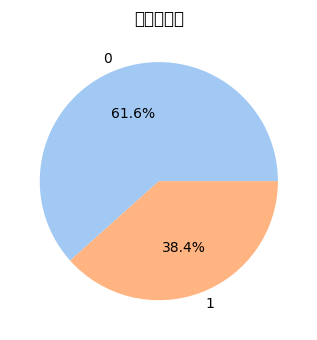

In [18]:
survived_count=cleaned_data['Survived'].value_counts()
plt.pie(survived_count, labels=survived_count.index, autopct='%.1f%%')
plt.title("幸存者比例")
plt.rcParams['font.family'] = 'SimSun'
plt.show()

从结果看，只有38.4%的人幸存下来。

（二）乘客年龄分布与是否幸存

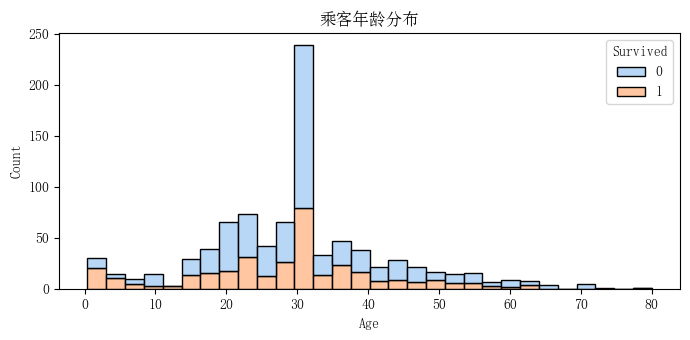

In [19]:
sns.histplot(cleaned_data,x='Age',hue='Survived',multiple='stack')
plt.title('乘客年龄分布')
plt.show()

乘客年龄分布比较均匀，集中在15-45年龄段

（三）船票金额分布

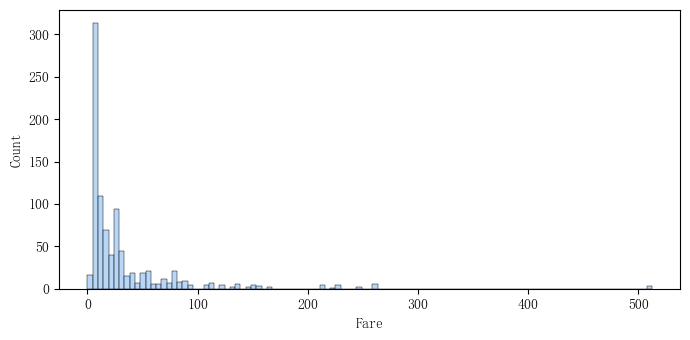

In [20]:
sns.histplot(cleaned_data,x='Fare')
plt.show()

船票价格整体还是偏低的，但有较高的船票价格

船票价格与幸存的关系图

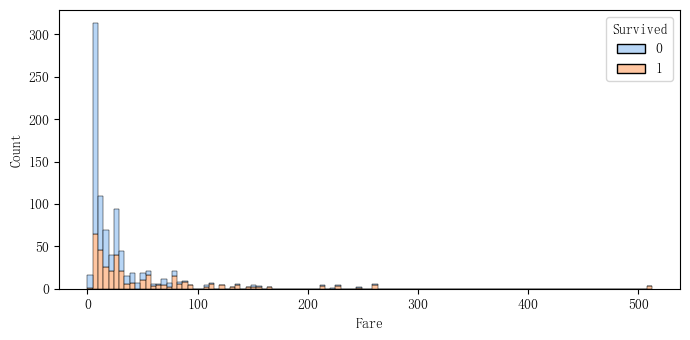

In [21]:
sns.histplot(cleaned_data,x='Fare',hue='Survived',multiple='stack')
plt.show()

（四）座舱等级与是否幸存

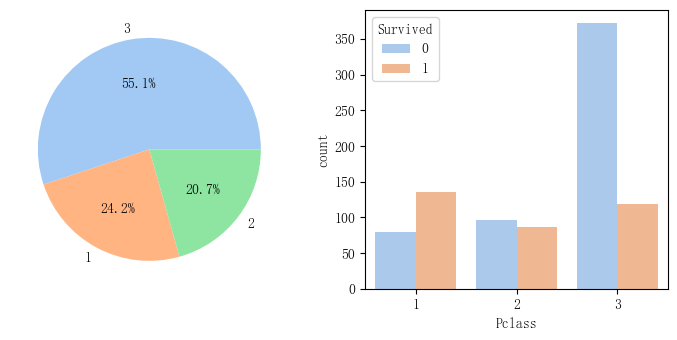

In [22]:
fig,axes=plt.subplots(1,2) 
pclass_count=cleaned_data['Pclass'].value_counts()
axes[0].pie(pclass_count, labels=pclass_count.index, autopct='%.1f%%')
sns.countplot(cleaned_data,x='Pclass',hue='Survived',ax=axes[1])
plt.show()


（五）性别与是否幸存的关系

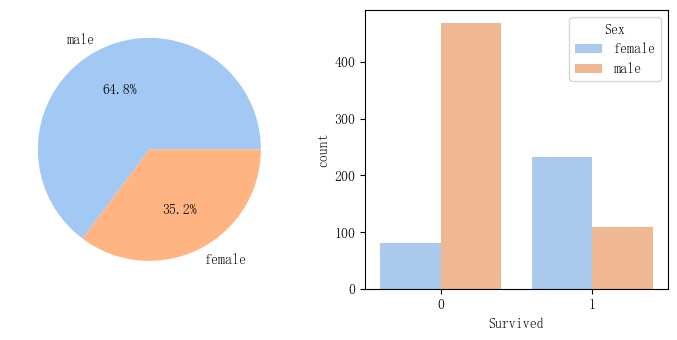

In [23]:
fig,axes=plt.subplots(1,2) 
sex_count=cleaned_data['Sex'].value_counts()
axes[0].pie(sex_count, labels=sex_count.index, autopct='%.1f%%')
sns.countplot(cleaned_data,x='Survived',hue='Sex',ax=axes[1])
plt.show()

（六）登船港口与是否幸存的关系

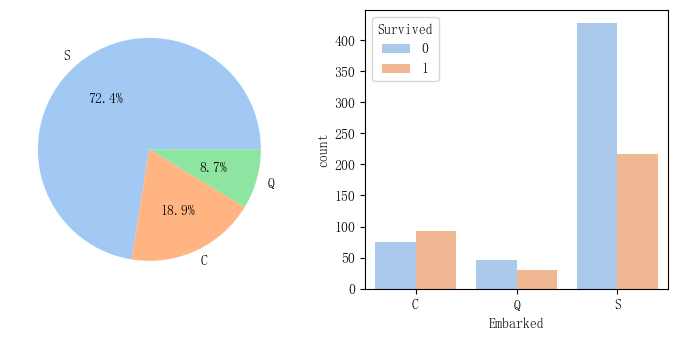

In [24]:
fig,axes=plt.subplots(1,2) 
embarked_count=cleaned_data['Embarked'].value_counts()
axes[0].pie(embarked_count, labels=embarked_count.index, autopct='%.1f%%')
sns.countplot(cleaned_data,x='Embarked',hue='Survived',ax=axes[1])
plt.show()

（七）家庭数量与是否幸存的关系

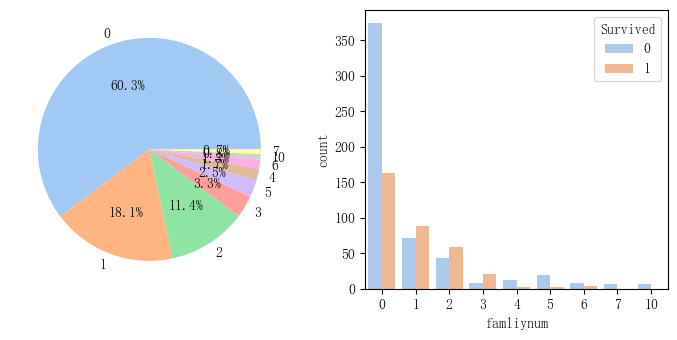

In [25]:
fig,axes=plt.subplots(1,2) 
familynum_count=cleaned_data['famliynum'].value_counts()
axes[0].pie(familynum_count, labels=familynum_count.index, autopct='%.1f%%')
sns.countplot(cleaned_data,x='famliynum',hue='Survived',ax=axes[1])
plt.show()

# 五 逻辑分析

In [26]:
import statsmodels.api as sm

In [27]:
lr_titanic=cleaned_data.copy()

In [28]:
lr_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,famliynum
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [29]:
# 移除对最终分析没有用的列数据
lr_titanic=lr_titanic.drop(['Name','Embarked','Cabin','Ticket','PassengerId'],axis=1)

1 对分类变量引入虚拟变量

In [30]:
lr_titanic.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,famliynum
0,0,3,male,22.0,1,0,7.2500,1
1,1,1,female,38.0,1,0,71.2833,1
2,1,3,female,26.0,0,0,7.9250,0
3,1,1,female,35.0,1,0,53.1000,1
4,0,3,male,35.0,0,0,8.0500,0


In [31]:
lr_titanic=pd.get_dummies(lr_titanic,columns=['Pclass','Sex'],dtype=int,drop_first=True)

In [32]:
lr_titanic.head()

,Survived,Age,SibSp,Parch,Fare,famliynum,Pclass_2,Pclass_3,Sex_male
0,0,22.0,1,0,7.2500,1,0,1,1
1,1,38.0,1,0,71.2833,1,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0
3,1,35.0,1,0,53.1000,1,0,0,0
4,0,35.0,0,0,8.0500,0,0,1,1


2 划分自变量和因变量

In [33]:
y=lr_titanic['Survived']
X=lr_titanic.drop(['Survived'],axis=1)

3 检测自变量相关性

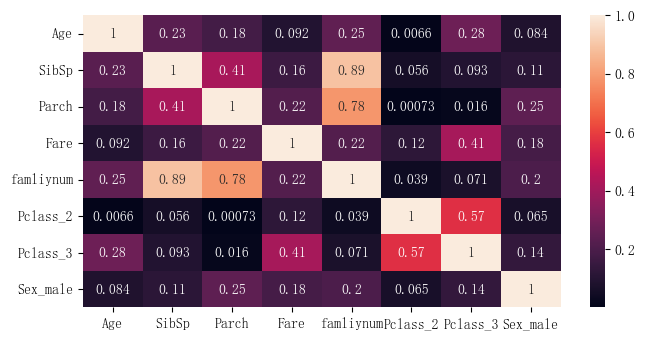

In [34]:
sns.heatmap(X.corr().abs(),annot=True)
plt.rcParams["figure.figsize"] = [10,5 ]
plt.show()


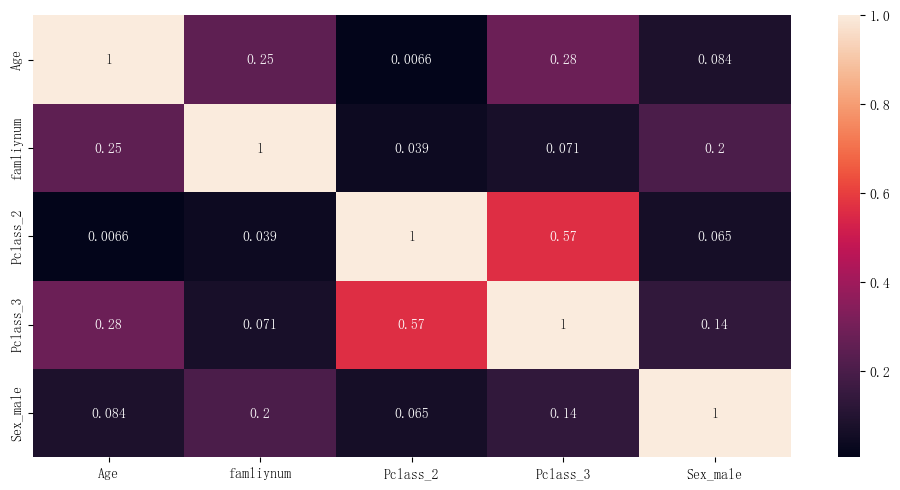

In [35]:
# 删去自变量中相关性较高的2个变量，再检测自变量相关性
X=X.drop(['SibSp','Parch','Fare'],axis=1)
sns.heatmap(X.corr().abs(),annot=True)
plt.rcParams["figure.figsize"] = [10,5 ]
plt.show()

4 把截距纳入模型

In [36]:
X=sm.add_constant(X)

5 建立逻辑回归模型

In [37]:
model=sm.Logit(y,X)
result=model.fit()

Optimization terminated successfully.
         Current function value: 0.444623
         Iterations 6


6 展示模型结果

In [53]:
import numpy as np
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      885
Method:                           MLE   Df Model:                            5
Date:                Wed, 21 Aug 2024   Pseudo R-squ.:                  0.3323
Time:                        23:06:35   Log-Likelihood:                -396.16
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 4.927e-83
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0620      0.404     10.049      0.000       3.270       4.854
Age           -0.0395      0.008     -5.065      0.000      -0.055      -0.024
famliynum     -0.2186      0.065     -3.383      0.001      -0.345      -0.092
Pclass_2      -1.1798      0.261     -4.518      0.000      -1.692      -0.668
Pclass_3      -2.3458      0.242     -9.676      0.000      -2.821      -1.871
Sex_male      -2.7854      0.198    -14.069      0.000      -3.173      -2.397
==============================================================================
"""

In [54]:
# Age
np.exp(-0.0395)

np.float64(0.9612699539905982)

表明 年龄每增加1岁，生还概率乘以0.96，即生还概率降低4%

In [55]:
# FamilyNum
np.exp(-0.2186)

np.float64(0.803643111115195)

每多一个成员，生还概率乘以0.8，即生还概率降低20*

In [56]:
# Pclass_2
np.exp(-1.1798)

np.float64(0.30734020049483596)

以上结果说明，二等舱乘客的生还概率比一等舱乘客低71%左右。

In [57]:
# Pclass_3
np.exp(-2.3458)

np.float64(0.09577055503172162)

以上结果说明，三等舱乘客的生还概率比一等舱乘客低90%左右。

In [58]:
# Sex_male
np.exp(-2.7854)

np.float64(0.061704402333015156)

以上结果说明，男性乘客的生还概率比女性乘客低94%左右。

7 预测数据 

In [39]:
ori_test_data=pd.read_csv(r"C:\Users\squall\Desktop\jupyter\课程配套文件\07 数据分析\titanic_test.csv")

In [40]:
predict_data=ori_test_data.copy()

In [41]:
predict_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [42]:
X.head()

,const,Age,famliynum,Pclass_2,Pclass_3,Sex_male
0,1.0,22.0,1,0,1,1
1,1.0,38.0,1,0,0,0
2,1.0,26.0,0,0,1,0
3,1.0,35.0,1,0,0,0
4,1.0,35.0,0,0,1,1


In [43]:
predict_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [44]:
predict_data['familynum']=predict_data['SibSp']+predict_data['Parch']
predict_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,familynum
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,0
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0


In [45]:
#删除多余列数据
predict_data=predict_data.drop(['Fare','PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis=1)

In [46]:
predict_data

,Pclass,Sex,Age,familynum
0,3,male,34.5,0
1,3,female,47.0,1
2,2,male,62.0,0
3,3,male,27.0,0
4,3,female,22.0,2
...,...,...,...,...
413,3,male,NaN,0
414,1,female,39.0,0
415,3,male,38.5,0
416,3,male,NaN,0


In [47]:
# 给预测数据引入截距项
predict_data=sm.add_constant(predict_data)
predict_data

,const,Pclass,Sex,Age,familynum
0,1.0,3,male,34.5,0
1,1.0,3,female,47.0,1
2,1.0,2,male,62.0,0
3,1.0,3,male,27.0,0
4,1.0,3,female,22.0,2
...,...,...,...,...,...
413,1.0,3,male,NaN,0
414,1.0,1,female,39.0,0
415,1.0,3,male,38.5,0
416,1.0,3,male,NaN,0


In [48]:
# 填充丢失列的数据
predict_data['Age']=predict_data['Age'].fillna(predict_data['Age'].mean())

In [49]:
# 转换预测数据中的Sex Pclass的分类变量的类型
predict_data['Pclass']=pd.Categorical(predict_data['Pclass'],categories=["1","2","3"])
predict_data['Sex']=pd.Categorical(predict_data['Sex'],categories=["female","male"])

In [50]:
# 给分类变量转换成虚拟变量
predict_data=pd.get_dummies(predict_data,drop_first=True,dtype=int,columns=['Pclass','Sex'])
predict_data

,const,Age,familynum,Pclass_2,Pclass_3,Sex_male
0,1.0,34.50000,0,0,0,1
1,1.0,47.00000,1,0,0,0
2,1.0,62.00000,0,0,0,1
3,1.0,27.00000,0,0,0,1
4,1.0,22.00000,2,0,0,0
...,...,...,...,...,...,...
413,1.0,30.27259,0,0,0,1
414,1.0,39.00000,0,0,0,0
415,1.0,38.50000,0,0,0,1
416,1.0,30.27259,0,0,0,1


In [51]:
# 预测数据
predict_value=model.fit().predict(predict_data)
predict_bool=predict_value > 0.5

Optimization terminated successfully.
         Current function value: 0.444623
         Iterations 6


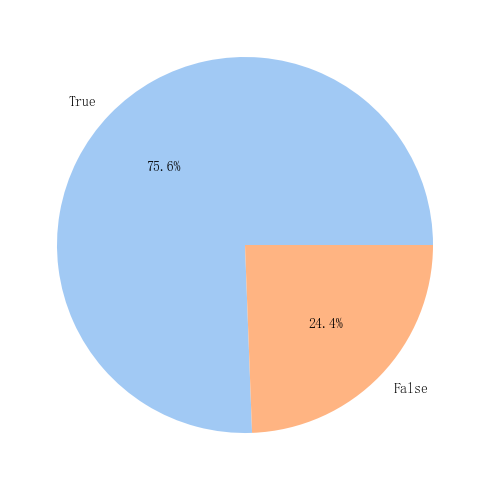

In [52]:
# 使用饼图展示结果
count=predict_bool.value_counts()
plt.pie(count,labels=count.index,autopct='%.1f%%')
plt.show()